## Background

mnist is of type base.Datasets. Datasets are namedtuples (See https://docs.python.org/3.6/library/collections.html#collections.namedtuple).

Datasets are defined in /home/rm/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/base.py. Datasets contain three objects of type mnist.DataSet.

The class DataSet is defined in /home/rm/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py.

The class Dataset has the following properties & methods that are used in the code below.

    the property: num_examples the method: next_batch()

For code that illustrates the above, see the set of print() statements in MNIST-mod1.ipynb
## Change to the code

mnist.Datasets are no longer to be used. The training, validation, and test data will now be read in differently. So the functionality provided by mnist.Datasets have to be replicated.


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
#import sys, os

In [2]:
#Import the jupyter notebook that interfaces to the module that reads the MINST data
#The read functionality is provided by Jupyter notebook: 
    #/home/rm/cjalmeida/tf_mnist/data.ipynb
#The MINST data files are in:  /home/rm/cjalmeida/input

#See https://gist.github.com/DCAL12/1a872bd63bedfb7b12612c8a7ec0f52e#file-notebook_importing-py
from nbextensions import notebook_importing
from modGetMNIST_Data_Labels import fnGetCompleteListOfTraining_Data_Labels
from modGetMNIST_Data_Labels import fnGetCompleteListOfTest_Data_Labels

importing Jupyter notebook from modGetMNIST_Data_Labels.ipynb


In [3]:
# Parameters
learning_rate = 0.001
training_epochs = 40
display_step = 1
######################
#RM
H_IN_PIXELS = 28
W_IN_PIXELS = 28
INPUT_SHAPE = [None, H_IN_PIXELS * W_IN_PIXELS] #Shape of Input data
OUTPUT_SHAPE = [None, 10] #Shape of Labels
BATCH_SIZE = 100

In [4]:
#INPUT for the graph
#######################
# See "Wrapping all together -> Switch between train and test set using Initializable iterator"
# in Tensorflow-Dataset-Tutorial/dataset_tutorial.ipynb
#
# create a placeholder to dynamically switch between batch sizes

# tf Graph input
batch_size = tf.placeholder(tf.int64)

x, y = tf.placeholder(tf.float64, shape=INPUT_SHAPE), \
                tf.placeholder(tf.int8, shape=OUTPUT_SHAPE)
dataset = tf.data.Dataset.from_tensor_slices((x, y)).batch(batch_size).repeat()

iter = dataset.make_initializable_iterator()
BatchOfFeatures_Labels = iter.get_next()

####################################################################



In [5]:
# Network Parameters
n_hidden_1 = 256 # 1st layer num features
n_hidden_2 = 256 # 2nd layer num features
n_input = INPUT_SHAPE[1] #784 # MNIST data input (img shape: 28*28)
n_classes = OUTPUT_SHAPE[1] #10 # MNIST total classes (0-9 digits)

Features = tf.placeholder(tf.float64, shape=INPUT_SHAPE)
TrueLabels = tf.placeholder(tf.float64, shape=OUTPUT_SHAPE)

#weights layer 1
h = tf.Variable(tf.random_normal([n_input, n_hidden_1], dtype=tf.float64))
#bias layer 1
bias_layer_1 = tf.Variable(tf.random_normal([n_hidden_1], dtype=tf.float64))
#layer 1
layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(Features,h),bias_layer_1))

#weights layer 2
w = tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2], dtype=tf.float64))
#bias layer 2
bias_layer_2 = tf.Variable(tf.random_normal([n_hidden_2], dtype=tf.float64))
#layer 2
layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1,w),bias_layer_2))

#weights output layer
output_weights = tf.Variable(tf.random_normal([n_hidden_2, n_classes], dtype=tf.float64))
#biar output layer
bias_output = tf.Variable(tf.random_normal([n_classes], dtype=tf.float64))
#output layer
output_layer = tf.matmul(layer_2, output_weights) + bias_output

# cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=output_layer, labels=TrueLabels))
# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost) 
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
  
# Test model
correct_prediction = tf.equal(tf.argmax(output_layer, 1), tf.argmax(TrueLabels, 1))

# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float64))

# Initializing the variables
init_vars = tf.global_variables_initializer()



In [6]:
#Plot settings
avg_set = []
epoch_set=[]

#Read the complete MNIST training data file
training_images, training_labels, no_of_training_images = fnGetCompleteListOfTraining_Data_Labels()

#print("training_images.shape, before flattening: ", training_images.shape)
assert(60000 == no_of_training_images)
assert(training_images.shape == (no_of_training_images, H_IN_PIXELS, W_IN_PIXELS, 1))
training_images = training_images.reshape(no_of_training_images, 28 * 28)
#print("training_images.shape after flattening: ", training_images.shape)
assert(training_images.shape == (no_of_training_images, H_IN_PIXELS * W_IN_PIXELS))
assert(training_labels.shape == (no_of_training_images, 10))

importing Jupyter notebook from /home/rm/cjalmeida/tf_mnist/data.ipynb
Path to Input Files:  /home/rm/cjalmeida/input

DONE: fnGetCompleteListOfMNIST_Data_Labels


Epoch: 0000 cost= 1.575209864
Epoch: 0001 cost= 0.595673502
Epoch: 0002 cost= 0.437544188
Epoch: 0003 cost= 0.346193857
Epoch: 0004 cost= 0.284494336
Epoch: 0005 cost= 0.237514817
Epoch: 0006 cost= 0.199832517
Epoch: 0007 cost= 0.170502007
Epoch: 0008 cost= 0.147278556
Epoch: 0009 cost= 0.128153464
Epoch: 0010 cost= 0.111631877
Epoch: 0011 cost= 0.097631762
Epoch: 0012 cost= 0.085045251
Epoch: 0013 cost= 0.076402668
Epoch: 0014 cost= 0.064842615
Epoch: 0015 cost= 0.057188044
Epoch: 0016 cost= 0.052186946
Epoch: 0017 cost= 0.045555877
Epoch: 0018 cost= 0.040577601
Epoch: 0019 cost= 0.036325459
Epoch: 0020 cost= 0.032723835
Epoch: 0021 cost= 0.028912069
Epoch: 0022 cost= 0.025686410
Epoch: 0023 cost= 0.023712999
Epoch: 0024 cost= 0.021092375
Epoch: 0025 cost= 0.020314586
Epoch: 0026 cost= 0.017732807
Epoch: 0027 cost= 0.016205103
Epoch: 0028 cost= 0.013969928
Epoch: 0029 cost= 0.012992943
Epoch: 0030 cost= 0.015433276
Epoch: 0031 cost= 0.014845494
Epoch: 0032 cost= 0.011260412
Epoch: 003

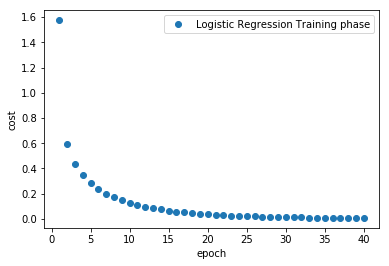


DONE: Training phase
Path to Input Files:  /home/rm/cjalmeida/input

DONE: fnGetCompleteListOfTest_Data_Labels
Model accuracy (with Test Data): 0.9535


In [7]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init_vars)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_no_of_batches = no_of_training_images//BATCH_SIZE
######################################
        # initialise iterator with train data
        sess.run(iter.initializer, feed_dict={ x: training_images,\
                                              y: training_labels, \
                                              batch_size: BATCH_SIZE})
######################################
        # Loop over all batches
        for batch_no in range(total_no_of_batches):
            #if(0 == batch_no):
            #    print("Epoch No: {}, Batch No:{}".format(epoch, batch_no))
            ListOfFeatures_Labels = sess.run(BatchOfFeatures_Labels)
            batch_Features = ListOfFeatures_Labels[0].astype(np.float64)
            batch_Labels = ListOfFeatures_Labels[1]

            assert(batch_Features.shape == (BATCH_SIZE, H_IN_PIXELS * W_IN_PIXELS))

            # Fit training using batch data
            sess.run(optimizer, \
                     feed_dict={Features: batch_Features, \
                               TrueLabels: batch_Labels})
            # Compute average loss
            avg_cost += (sess.run(cost, \
                                 feed_dict={Features: batch_Features, \
                                           TrueLabels: batch_Labels}) \
                                )/total_no_of_batches
        # Display logs per epoch step
        if epoch % (1) == 0:
            print ("Epoch:", '%04d' % (epoch), "cost=", "{:.9f}".format(avg_cost))
        avg_set.append(avg_cost)
        epoch_set.append(epoch+1)
        
    #Plot it
    plt.plot(epoch_set,avg_set, 'o', label='Logistic Regression Training phase')
    plt.ylabel('cost')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

    print ("\nDONE: Training phase")
    ## Test model
    #Check accuracy using test data
    test_images, test_labels, no_of_test_images = fnGetCompleteListOfTest_Data_Labels()

    assert(10000 == no_of_test_images)
    assert(test_images.shape == (no_of_test_images, H_IN_PIXELS, W_IN_PIXELS, 1))

    test_images = (test_images.reshape(no_of_test_images, 28 * 28)).astype(np.float64)

    assert(test_images.shape == (no_of_test_images, H_IN_PIXELS * W_IN_PIXELS))
    assert(test_labels.shape == (no_of_test_images, 10))

    print ("Model accuracy (with Test Data):", accuracy.eval({Features: test_images, \
                                          TrueLabels: test_labels}))
